In [1]:
def get_obj_values(run_gen_text_content: str):
    output_list = []
    for solution_text in run_gen_text_content.split("--------------")[:-1]:
        run_gen_solution_text_content = solution_text
        output_list.append([float(item[item.find(': ')+2:]) for item in run_gen_solution_text_content[run_gen_solution_text_content.find(']')+1:].split('\n')[1:-1]])
    return output_list

In [2]:
import os

def load_runs_and_gens_as_dict(directory="."):
    data = {}
    run_index = 0

    while True:
        run_key = f"run_{run_index}"
        gen_index = 0
        run_data = []

        while True:
            filename = f"{run_key}_gen_{gen_index}.txt"
            filepath = os.path.join(directory, filename)

            if os.path.isfile(filepath):
                with open(filepath, 'r', encoding='utf-8') as f:
                    run_data.append(get_obj_values(f.read()))
                gen_index += 1
            else:
                break  # No more gens for this run

        if run_data:
            data[run_key] = run_data
            run_index += 1
        else:
            break  # No more runs

    return data


In [3]:
run_gen_dict = load_runs_and_gens_as_dict()
run_gen_dict

{'run_0': [[[0.48, 0.45, 0.39],
   [0.46, 0.48, 0.62],
   [0.53, 0.41, 0.45],
   [0.44, 0.42, 0.64],
   [0.56, 0.4, 0.65]],
  [[0.48, 0.45, 0.39],
   [0.53, 0.41, 0.45],
   [0.44, 0.42, 0.64],
   [0.56, 0.4, 0.65],
   [0.45, 0.42, 0.57],
   [0.44, 0.4, 0.72],
   [0.61, 0.39, 0.53],
   [0.54, 0.42, 0.38],
   [0.51, 0.41, 0.66],
   [0.47, 0.45, 0.44],
   [0.52, 0.44, 0.55],
   [0.53, 0.43, 0.39],
   [0.43, 0.49, 0.48]],
  [[0.48, 0.45, 0.39],
   [0.53, 0.41, 0.45],
   [0.44, 0.4, 0.72],
   [0.47, 0.45, 0.44],
   [0.43, 0.49, 0.48],
   [0.51, 0.39, 0.46],
   [0.39, 0.43, 0.69],
   [0.52, 0.42, 0.34],
   [0.38, 0.44, 0.5],
   [0.44, 0.41, 0.48],
   [0.48, 0.43, 0.43]]],
 'run_1': [[[0.54, 0.65, 0.25],
   [0.49, 0.65, 0.5],
   [0.64, 0.62, 0.48],
   [0.53, 0.68, 0.23],
   [0.61, 0.64, 0.25],
   [0.55, 0.65, 0.2],
   [0.56, 0.64, 0.33],
   [0.57, 0.63, 0.34],
   [0.52, 0.69, 0.27],
   [0.48, 0.7, 0.26]],
  [[0.55, 0.65, 0.2],
   [0.57, 0.63, 0.34],
   [0.54, 0.67, 0.21],
   [0.45, 0.65, 0.23

In [4]:
def dict_to_data_for_visualization(run_gen_values_dict: dict):
    all = {}
    for key,run in run_gen_values_dict.items():
        all[key] = {}
        for generation in run:
            all[key][run.index(generation)] = {}
            min_obj1 = min([solution[0] for solution in generation])
            min_obj2 = min([solution[1] for solution in generation])
            min_obj3 = min([solution[2] for solution in generation])
            avg_obj1 = sum([solution[0] for solution in generation]) / len(generation)
            avg_obj2 = sum([solution[1] for solution in generation]) / len(generation)
            avg_obj3 = sum([solution[2] for solution in generation]) / len(generation)

            all[key][run.index(generation)]["min_obj1"] = min_obj1
            all[key][run.index(generation)]["min_obj2"] = min_obj2
            all[key][run.index(generation)]["min_obj3"] = min_obj3

            all[key][run.index(generation)]["avg_obj1"] = avg_obj1
            all[key][run.index(generation)]["avg_obj2"] = avg_obj2
            all[key][run.index(generation)]["avg_obj3"] = avg_obj3

            print(f"For the run index {key} and generation index {run.index(generation)}:")
            print(f"MIN of objective index 0: {min_obj1}")
            print(f"MIN of objective index 1: {min_obj2}")
            print(f"MIN of objective index 2: {min_obj3}")
            print(f"AVG of objective index 0: {avg_obj1}")
            print(f"AVG of objective index 1: {avg_obj2}")
            print(f"AVG of objective index 2: {avg_obj3}")
            print("--------------")
    return all


visualization_data = dict_to_data_for_visualization(run_gen_dict)
visualization_data

For the run index run_0 and generation index 0:
MIN of objective index 0: 0.44
MIN of objective index 1: 0.4
MIN of objective index 2: 0.39
AVG of objective index 0: 0.49400000000000005
AVG of objective index 1: 0.43200000000000005
AVG of objective index 2: 0.55
--------------
For the run index run_0 and generation index 1:
MIN of objective index 0: 0.43
MIN of objective index 1: 0.39
MIN of objective index 2: 0.38
AVG of objective index 0: 0.5007692307692307
AVG of objective index 1: 0.4253846153846154
AVG of objective index 2: 0.5269230769230769
--------------
For the run index run_0 and generation index 2:
MIN of objective index 0: 0.38
MIN of objective index 1: 0.39
MIN of objective index 2: 0.34
AVG of objective index 0: 0.46090909090909093
AVG of objective index 1: 0.4290909090909091
AVG of objective index 2: 0.4890909090909091
--------------
For the run index run_1 and generation index 0:
MIN of objective index 0: 0.48
MIN of objective index 1: 0.62
MIN of objective index 2: 0.2

{'run_0': {0: {'min_obj1': 0.44,
   'min_obj2': 0.4,
   'min_obj3': 0.39,
   'avg_obj1': 0.49400000000000005,
   'avg_obj2': 0.43200000000000005,
   'avg_obj3': 0.55},
  1: {'min_obj1': 0.43,
   'min_obj2': 0.39,
   'min_obj3': 0.38,
   'avg_obj1': 0.5007692307692307,
   'avg_obj2': 0.4253846153846154,
   'avg_obj3': 0.5269230769230769},
  2: {'min_obj1': 0.38,
   'min_obj2': 0.39,
   'min_obj3': 0.34,
   'avg_obj1': 0.46090909090909093,
   'avg_obj2': 0.4290909090909091,
   'avg_obj3': 0.4890909090909091}},
 'run_1': {0: {'min_obj1': 0.48,
   'min_obj2': 0.62,
   'min_obj3': 0.2,
   'avg_obj1': 0.549,
   'avg_obj2': 0.655,
   'avg_obj3': 0.311},
  1: {'min_obj1': 0.45,
   'min_obj2': 0.61,
   'min_obj3': 0.2,
   'avg_obj1': 0.5485714285714286,
   'avg_obj2': 0.6385714285714286,
   'avg_obj3': 0.25857142857142856},
  2: {'min_obj1': 0.44,
   'min_obj2': 0.61,
   'min_obj3': 0.19,
   'avg_obj1': 0.535,
   'avg_obj2': 0.6435714285714286,
   'avg_obj3': 0.27785714285714286}}}

{0: {'min_obj1': 0.44, 'min_obj2': 0.4, 'min_obj3': 0.39, 'avg_obj1': 0.49400000000000005, 'avg_obj2': 0.43200000000000005, 'avg_obj3': 0.55}, 1: {'min_obj1': 0.43, 'min_obj2': 0.39, 'min_obj3': 0.38, 'avg_obj1': 0.5007692307692307, 'avg_obj2': 0.4253846153846154, 'avg_obj3': 0.5269230769230769}, 2: {'min_obj1': 0.38, 'min_obj2': 0.39, 'min_obj3': 0.34, 'avg_obj1': 0.46090909090909093, 'avg_obj2': 0.4290909090909091, 'avg_obj3': 0.4890909090909091}}


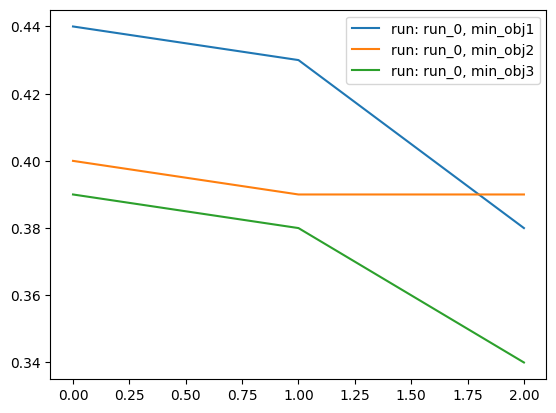

{0: {'min_obj1': 0.48, 'min_obj2': 0.62, 'min_obj3': 0.2, 'avg_obj1': 0.549, 'avg_obj2': 0.655, 'avg_obj3': 0.311}, 1: {'min_obj1': 0.45, 'min_obj2': 0.61, 'min_obj3': 0.2, 'avg_obj1': 0.5485714285714286, 'avg_obj2': 0.6385714285714286, 'avg_obj3': 0.25857142857142856}, 2: {'min_obj1': 0.44, 'min_obj2': 0.61, 'min_obj3': 0.19, 'avg_obj1': 0.535, 'avg_obj2': 0.6435714285714286, 'avg_obj3': 0.27785714285714286}}


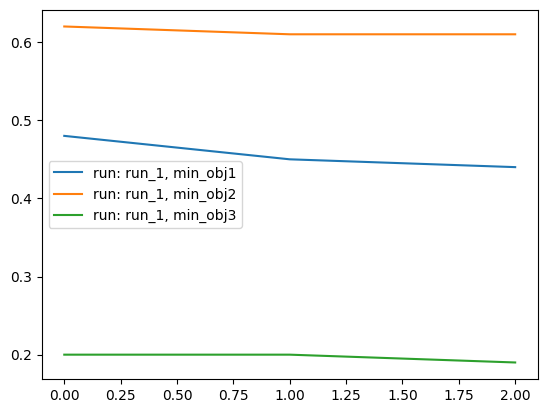

In [5]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        min_obj1_values = []
        min_obj2_values = []
        min_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            min_obj1 = gen_values["min_obj1"]
            min_obj2 = gen_values["min_obj2"]
            min_obj3 = gen_values["min_obj3"]

            min_obj1_values.append(min_obj1)
            min_obj2_values.append(min_obj2)
            min_obj3_values.append(min_obj3)

        plt.plot(gens, min_obj1_values, label=f"run: {run}, min_obj1")
        plt.plot(gens, min_obj2_values, label=f"run: {run}, min_obj2")
        plt.plot(gens, min_obj3_values, label=f"run: {run}, min_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)

{0: {'min_obj1': 0.44, 'min_obj2': 0.4, 'min_obj3': 0.39, 'avg_obj1': 0.49400000000000005, 'avg_obj2': 0.43200000000000005, 'avg_obj3': 0.55}, 1: {'min_obj1': 0.43, 'min_obj2': 0.39, 'min_obj3': 0.38, 'avg_obj1': 0.5007692307692307, 'avg_obj2': 0.4253846153846154, 'avg_obj3': 0.5269230769230769}, 2: {'min_obj1': 0.38, 'min_obj2': 0.39, 'min_obj3': 0.34, 'avg_obj1': 0.46090909090909093, 'avg_obj2': 0.4290909090909091, 'avg_obj3': 0.4890909090909091}}


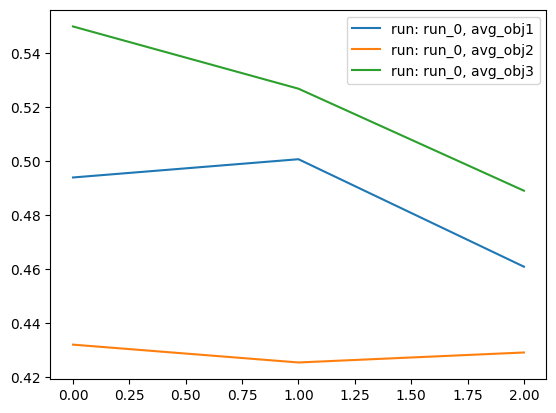

{0: {'min_obj1': 0.48, 'min_obj2': 0.62, 'min_obj3': 0.2, 'avg_obj1': 0.549, 'avg_obj2': 0.655, 'avg_obj3': 0.311}, 1: {'min_obj1': 0.45, 'min_obj2': 0.61, 'min_obj3': 0.2, 'avg_obj1': 0.5485714285714286, 'avg_obj2': 0.6385714285714286, 'avg_obj3': 0.25857142857142856}, 2: {'min_obj1': 0.44, 'min_obj2': 0.61, 'min_obj3': 0.19, 'avg_obj1': 0.535, 'avg_obj2': 0.6435714285714286, 'avg_obj3': 0.27785714285714286}}


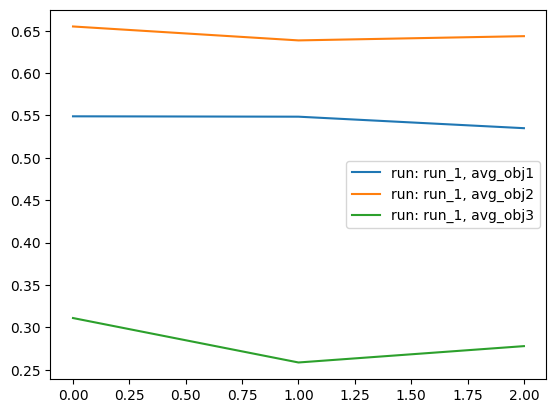

In [6]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        avg_obj1_values = []
        avg_obj2_values = []
        avg_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            avg_obj1 = gen_values["avg_obj1"]
            avg_obj2 = gen_values["avg_obj2"]
            avg_obj3 = gen_values["avg_obj3"]

            avg_obj1_values.append(avg_obj1)
            avg_obj2_values.append(avg_obj2)
            avg_obj3_values.append(avg_obj3)

        plt.plot(gens, avg_obj1_values, label=f"run: {run}, avg_obj1")
        plt.plot(gens, avg_obj2_values, label=f"run: {run}, avg_obj2")
        plt.plot(gens, avg_obj3_values, label=f"run: {run}, avg_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)